# Convergence order classification and plots
This notebook classifies the order of convergence of three sequences and plots them on a log-scale y-axis.

Sequences:
- (a) $a_n = 2^{-n}$
- (b) $a_n = (n+1)^{-1}$
- (c) $a_n = 2^{-2^n}$

We treat convergence to $0$, so the error is $e_n = |a_n|$.

## Definition (order of convergence)
A sequence has order $p$ if there exists $C\in(0,\infty)$ such that
$$\lim_{n\to\infty}\frac{e_{n+1}}{e_n^p}=C.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Define sequences and helper functions

In [2]:
def seq_a(n):
    # a_n = 2^{-n}
    return 2.0 ** (-n)

def seq_b(n):
    # a_n = (n+1)^{-1}
    return 1.0 / (n + 1.0)

def seq_c(n):
    # a_n = 2^{-2^n}
    return 2.0 ** (-(2.0 ** n))

def ratio_en1_en(e_n, e_n1):
    # q_n = e_{n+1} / e_n
    return e_n1 / e_n

def limit_estimate(values, tail=10):
    # crude tail average as an estimate of the limiting value
    if len(values) < tail:
        return float(np.mean(values))
    return float(np.mean(values[-tail:]))


## (a) $a_n = 2^{-n}$
Compute $q_n = e_{n+1}/e_n$ and observe it is constant.

In [3]:
N_a = 100
n_a = np.arange(1, N_a + 1)
a_vals = np.array([seq_a(int(n)) for n in n_a])
e_vals = np.abs(a_vals)

q_vals = e_vals[1:] / e_vals[:-1]
q_est = limit_estimate(q_vals, tail=10)

q_vals[:5], q_est


(array([0.5, 0.5, 0.5, 0.5, 0.5]), 0.5)

For linear convergence (order 1), we expect $\lim q_n = q$ with $0<q<1$.

In [4]:
print("Estimated limit of q_n for (a):", q_est)
if 0 < q_est < 1:
    print("Classification: linear (order p=1), with asymptotic factor q =", q_est)
else:
    print("Not linear by the ratio test (unexpected).")


Estimated limit of q_n for (a): 0.5
Classification: linear (order p=1), with asymptotic factor q = 0.5


## (b) $a_n = (n+1)^{-1}$
Here $q_n = e_{n+1}/e_n \to 1$, which indicates sublinear convergence.

In [5]:
N_b = 100
n_b = np.arange(1, N_b + 1)
b_vals = np.array([seq_b(int(n)) for n in n_b])
e_vals_b = np.abs(b_vals)

q_vals_b = e_vals_b[1:] / e_vals_b[:-1]
q_est_b = limit_estimate(q_vals_b, tail=10)

q_vals_b[:5], q_est_b


(array([0.66666667, 0.75      , 0.8       , 0.83333333, 0.85714286]),
 0.9896281106098896)

In [6]:
print("Estimated limit of q_n for (b):", q_est_b)
print("Since q_n -> 1, classification: sublinear convergence.")


Estimated limit of q_n for (b): 0.9896281106098896
Since q_n -> 1, classification: sublinear convergence.


## (c) $a_n = 2^{-2^n}$
Check whether $e_{n+1} = e_n^p$ for some $p$.

In [7]:
N_c = 10
n_c = np.arange(1, N_c + 1)
c_vals = np.array([seq_c(int(n)) for n in n_c])
e_vals_c = np.abs(c_vals)

# Test p=2: compute e_{n+1} / e_n^2
test_vals = e_vals_c[1:] / (e_vals_c[:-1] ** 2)
test_est = limit_estimate(test_vals, tail=min(5, len(test_vals)))

test_vals[:5], test_est


(array([1., 1., 1., 1., 1.]), 1.0)

In [8]:
print("Estimated limit of e_{n+1} / e_n^2 for (c):", test_est)
print("Since this tends to 1, classification: quadratic convergence (order p=2), C=1.")


Estimated limit of e_{n+1} / e_n^2 for (c): 1.0
Since this tends to 1, classification: quadratic convergence (order p=2), C=1.


## Plots (log-scale y-axis)
Plot $a_n$ from $n=1$ to $N$ with a logarithmic y-axis:
- (a) and (b): $N=100$
- (c): $N=10$

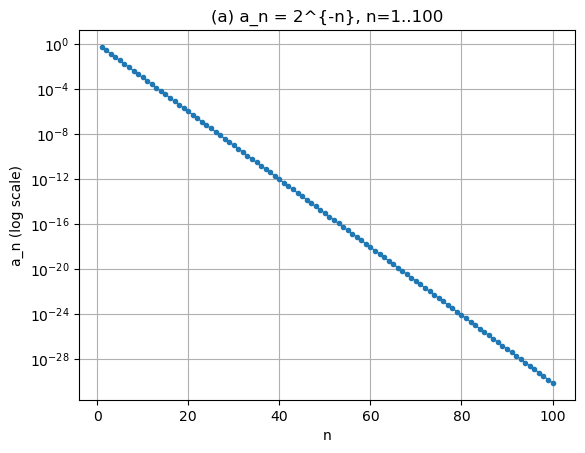

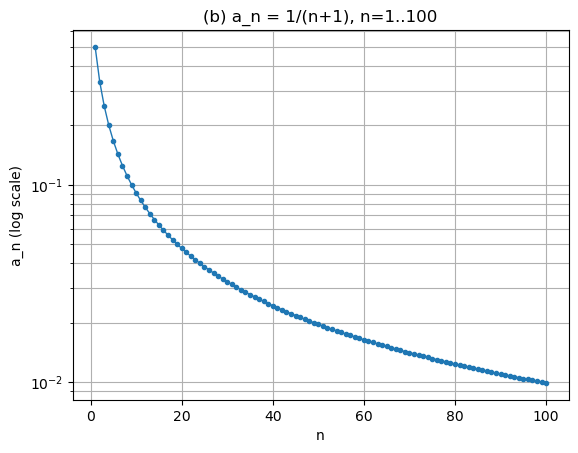

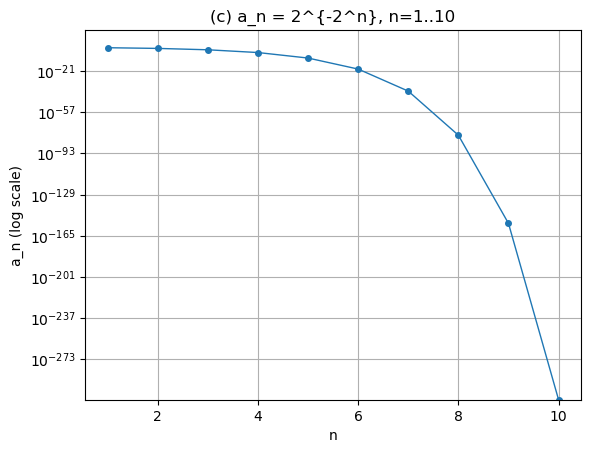

In [9]:
# Plot (a)
plt.figure()
plt.plot(n_a, a_vals, marker='o', markersize=3, linewidth=1)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('a_n (log scale)')
plt.title('(a) a_n = 2^{-n}, n=1..100')
plt.grid(True, which='both')
plt.show()

# Plot (b)
plt.figure()
plt.plot(n_b, b_vals, marker='o', markersize=3, linewidth=1)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('a_n (log scale)')
plt.title('(b) a_n = 1/(n+1), n=1..100')
plt.grid(True, which='both')
plt.show()

# Plot (c)
plt.figure()
plt.plot(n_c, c_vals, marker='o', markersize=4, linewidth=1)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('a_n (log scale)')
plt.title('(c) a_n = 2^{-2^n}, n=1..10')
plt.grid(True, which='both')
plt.show()


## Final classification
- (a) **Linear** (order \(p=1\)), with factor \(q=1/2\).
- (b) **Sublinear** (since \(e_{n+1}/e_n \to 1\)).
- (c) **Quadratic** (order \(p=2\)), since \(e_{n+1} = e_n^2\).